# 手动实现代码

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True, threshold=np.inf,precision=4)

def sigmoid(z):
    return 1/(1+np.exp(-z))


X = np.array([
    [80,150],
    [60,110],
    [35,130],
    [160,50],
    [160,20],
    [120,30]
])
y = np.array([0,0,0,1,1,1])

y = y.reshape(-1,1)

X = np.c_[np.ones(X.shape[0]),X]

Xy = np.c_[X,y]

m,n = X.shape
theta = np.zeros((n,1)).reshape(1,-1) # 1x3
epochs = 1
eta = 0.000001
tol=1e-2




for _ in range(epochs):
    
    np.random.shuffle(Xy)
    
    X = Xy[:,:-1]              # mxn
    Y = Xy[:,-1].reshape(-1,1)               # nx1
    
    z = np.dot(X,theta.T)
    
    grad = np.sum(X*(Y-sigmoid(z)),axis=0)

    
    if (np.abs(grad) <= tol ).all():
        break
    else:
        theta = theta - eta * grad

theta = theta.flatten()
theta

array([ 0.    , -0.0001,  0.0001])

In [2]:
p = sigmoid(np.dot(X, theta.T))
print("Y=1的概率被估计为：{:.2%}".format(p[0]))  # 调用score时，注释掉
p[np.where(p > 0.5)] = 1
p[np.where(p < 0.5)] = 0
p

Y=1的概率被估计为：50.20%


array([1., 0., 1., 0., 0., 1.])

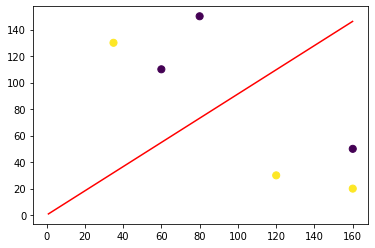

In [3]:
# y_pred = np.dot(X, theta.T)
# x = np.linspace(np.min(X[:,1]),np.max(X[:,1]),len(y_pred))
# plt.scatter(X[:,1],X[:,2],c=y.flatten())
# plt.plot(x,y_pred)

w1 = theta[1]
w2 = theta[2]
bias = theta[0]
x1 = np.arange(np.min(X), np.max(X), 0.1)
x2 = -w1 / w2 * x1 - bias / w2
plt.scatter(X[:, 1], X[:, 2], c=y.flatten(), s=50)
plt.plot(x1, x2, 'r')
plt.show()


# 线性回归

In [4]:
# 训练数据

data = np.array([
    [23,551],
    [216,539],
    [148,413],
    [35,310],
    [85,308],
    [204,519],
    [49,325],
    [25,332],
    [173,498],
    [191,498],
    [134,392],
    [99,334],
    [117,385],
    [112,387],
    [162,425],
    [272,659],
    [159,400],
    [159,427],
    [59,319],
    [198,522]
])
X,y = data[:,:-1],data[:,-1]
X.shape,y.shape

((20, 1), (20,))

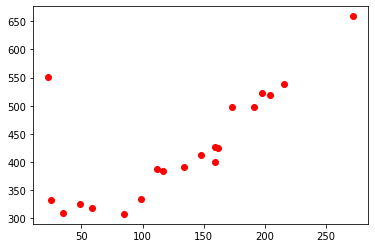

In [5]:
plt.scatter(X,y,c='r')

$$f_\theta(x)=\theta_0+\theta_1x$$
$$E(\theta)=\frac{1}{2}\sum^n_{i=1}(y^{i}-f_\theta(x^{(i)}))^2$$

In [6]:
# 参数初始化
theta0 = np.random.rand()
theta1 = np.random.rand()

theta0,theta1

(0.2687603726634049, 0.24816621041686437)

In [7]:
# 预测函数
def f(x,t0,t1):
    return t0+t1*x

# 目标函数
def E(x,y,theta0,theta1):
    return 0.5*np.sum((y-f(x,theta0,theta1))**2)

In [8]:
# 标准化 / z-score 规范化
def standardize(x):
    mu = x.mean()
    sigma = x.std()
    return (x-mu)/sigma

z = standardize(X)
z

array([[-1.5852],
       [ 1.2476],
       [ 0.2495],
       [-1.4091],
       [-0.6752],
       [ 1.0715],
       [-1.2036],
       [-1.5558],
       [ 0.6165],
       [ 0.8807],
       [ 0.044 ],
       [-0.4697],
       [-0.2055],
       [-0.2789],
       [ 0.455 ],
       [ 2.0695],
       [ 0.411 ],
       [ 0.411 ],
       [-1.0568],
       [ 0.9834]])

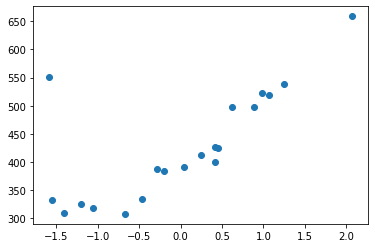

In [9]:
plt.scatter(z,y)

* 参数更新公式

$$
\theta_0:=\theta_0 - \eta\sum^n_{i=1}(f_\theta(x^{(i)}-y^{(i)}) \\
\theta_1:=\theta_1 - \eta\sum^n_{i=1}(f_\theta(x^{(i)}-y^{(i)}) x^{(i)}
\\
记 W = [\theta_0,\theta_1].T，X = [1,x].T
$$

第1次：theta0=9.0720046407,theta1=1.8506978592，差值=73979.6935228142
第2次：theta0=17.4335645478,theta1=3.2116134818，差值=71050.0976593108
第3次：theta0=25.6278932569,theta1=4.5453107920，差值=68236.5137920028
第4次：theta0=33.6583353918,theta1=5.8523341560，差值=65534.3478458389
第5次：theta0=41.5281686839,theta1=7.1332170527，差值=62939.1876711433
第6次：theta0=49.2406053102,theta1=8.3884822915，差值=60446.7958393670
第7次：theta0=56.7987932040,theta1=9.6186422255，差值=58053.1027241275
第8次：theta0=64.2058173400,theta1=10.8241989608，差值=55754.1998562522
第9次：theta0=71.4647009932,theta1=12.0056445615，差值=53546.3335419444
第10次：theta0=78.5784069733,theta1=13.1634612501，差值=51425.8987336839
第11次：theta0=85.5498388338,theta1=14.2981216049，差值=49389.4331438292
第12次：theta0=92.3818420571,theta1=15.4100887526，差值=47433.6115913342
第13次：theta0=99.0772052160,theta1=16.4998165574，差值=45555.2405723170
第14次：theta0=105.6386611117,theta1=17.5677498061，差值=43751.2530456535
第15次：theta0=112.0688878895,theta1=18.6143243898，差值=42018.7034250456
第16次：theta

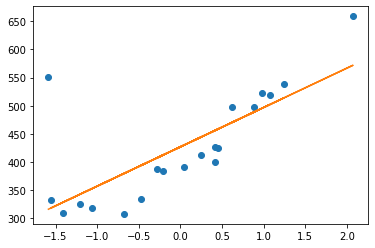

In [10]:
# 训练数据

data = np.array([
    [23,551],
    [216,539],
    [148,413],
    [35,310],
    [85,308],
    [204,519],
    [49,325],
    [25,332],
    [173,498],
    [191,498],
    [134,392],
    [99,334],
    [117,385],
    [112,387],
    [162,425],
    [272,659],
    [159,400],
    [159,427],
    [59,319],
    [198,522]
])
X,y = data[:,:-1],data[:,-1]

# 参数初始化
# w = np.random.random((2,1))
w = np.array([
    [np.random.rand()],
    [np.random.rand()],
])

# 预测函数
def f(x,w):
    return x.dot(w)

# 目标函数
def E(x,y,w):
    return 0.5*np.sum((y-f(x,w))**2)

# 标准化 / z-score 规范化
def standardize(x):
    mu = x.mean()
    sigma = x.std()
    return (x-mu)/sigma

z = standardize(X)
z = np.c_[np.ones(z.shape[0]),z]
y = y.reshape(-1,1)

eta = 1e-3       # 学习率
epoches = 10000  # 迭代次数
diff = 1         # 误差
count = 0        # 记录学习次数

error = E(z,y,w)

while diff > 1e-6:
    
    
    w = w - eta*z.T.dot(f(z,w)-y)
    
    current_error = E(z,y,w)
    diff = error-current_error
    error = current_error
    
    count = count + 1
    
    log = "第{}次：theta0={:.10f},theta1={:.10f}，差值={:.10f}".format(count,w[0][0],w[1][0],diff)
    print(log)
plt.plot(z[:,-1],y,'o')
plt.plot(z[:,-1],f(z,w))

In [11]:
# 最快下降法/梯度下降
# 随机梯度下降
# 小批量梯度下降

# 多元线性回归（多项式回归）

$f_\theta(x)=\theta_0+\theta_1x+\theta_2x^2$,即 \\
$$\theta = [\theta_0,\theta_1,\theta2]^T,x^{(i)}=[1,x^{(i)},x^{(i)^2}]$$

第1次：差值=1207990.1887853500
第2次：差值=296107.3405363431
第3次：差值=101855.3409954454
第4次：差值=54855.8142179420
第5次：差值=39204.9160018961
第6次：差值=31091.8516750881
第7次：差值=25435.5852628854
第8次：差值=21012.0663359631
第9次：差值=17425.2970483701
第10次：差值=14481.0925103963
第11次：差值=12051.1769635671
第12次：差值=10039.2835886660
第13次：差值=8369.7665918976
第14次：差值=6982.0384386077
第15次：差值=5827.0578045120
第16次：差值=4864.8400239548
第17次：差值=4062.6045704949
第18次：差值=3393.3612451645
第19次：差值=2834.8122644782
第20次：差值=2368.4877478830
第21次：差值=1979.0570555694
第22次：差值=1653.7748752211
第23次：差值=1382.0321229315
第24次：差值=1154.9894537687
第25次：差值=965.2766224353
第26次：差值=806.7448371585
第27次：差值=674.2620973547
第28次：差值=563.5436203379
第29次：差值=471.0110601446
第30次：差值=393.6754484210
第31次：差值=329.0397432507
第32次：差值=275.0176263118
第33次：差值=229.8657909102
第34次：差值=192.1274485280
第35次：差值=160.5851753026
第36次：差值=134.2215415319
第37次：差值=112.1862313835
第38次：差值=93.7685776635
第39次：差值=78.3746164828
第40次：差值=65.5079158409
第41次：差值=54.7535560399
第42次：差值=45.7647428783
第43次：差值=

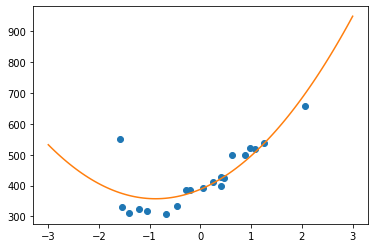

In [12]:
def f(x,theta):
    return np.dot(x,theta)

# 目标函数
def E(x,y,theta):
    return 0.5*np.sum((y-f(x,theta))**2)

# 均方误差
def MSE(x,y,theta):
    return 1.0/y.shape[0]*np.sum((y-f(x,theta))**2)

# 标准化 / z-score 规范化
def standardize(x):
    mu = x.mean()
    sigma = x.std()
    return (x-mu)/sigma

data = np.array([
    [23,551],
    [216,539],
    [148,413],
    [35,310],
    [85,308],
    [204,519],
    [49,325],
    [25,332],
    [173,498],
    [191,498],
    [134,392],
    [99,334],
    [117,385],
    [112,387],
    [162,425],
    [272,659],
    [159,400],
    [159,427],
    [59,319],
    [198,522]
])
X,y = data[:,:-1],data[:,-1]
y = y.reshape(-1,1)
diff = 1
eta = 1e-2

count = 0
z = standardize(X)

z = np.c_[np.ones(z.shape[0]),z,z**2]
theta = np.random.random((z.shape[1],1))

errors = []

error = E(z,y,theta)
errors.append(MSE(z,y,theta))

while diff > 1e-2:
    
    theta = theta-eta*z.T.dot(f(z,theta)-y)
    
    current_error = E(z,y,theta)
    diff = error-current_error
    error = current_error
    count = count + 1
    errors.append(MSE(z,y,theta))
    
    log = "第{}次：差值={:.10f}".format(count,diff)
    
    print(log)

x = np.array(np.linspace(-3,3,100))
plt.plot(z[:,1],y,'o')
plt.plot(x,f(np.c_[np.ones(x.size),x,x**2],theta))

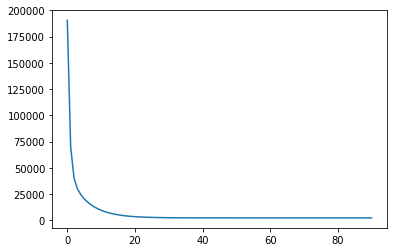

In [13]:
plt.plot(np.arange(len(errors)),errors)

# 逻辑回归

In [14]:
data = np.array([
    [153,432,0],
    [220,262,0],
    [118,214,0],
    [474,384,1],
    [485,411,1],
    [233,430,0],
    [396,361,1],
    [484,349,1],
    [429,259,1],
    [286,220,1],
    [399,433,0],
    [403,340,1],
    [252,34,1],
    [497,472,1],
    [379,416,0],
    [76,163,0],
    [263,112,1],
    [26,193,0],
    [61,473,0],
    [420,253,1]
])
X,y = data[:,:-1],data[:,-1]
y = y.reshape(-1,1)
X.shape,y.shape

((20, 2), (20, 1))

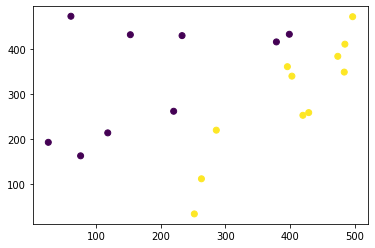

In [15]:
plt.scatter(X[:,0],X[:,1],c=y[:,0])

In [16]:
z = standardize(X)

In [17]:
X = np.c_[np.ones(z.shape[0]),z]
X.shape

(20, 3)

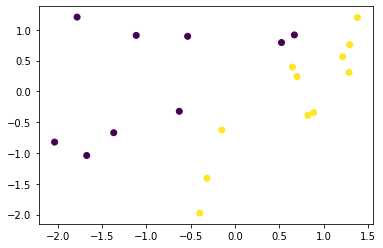

In [18]:
plt.scatter(z[:,0],z[:,1],c=y[:,0])

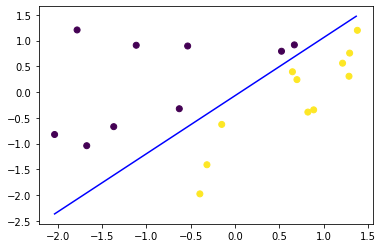

In [19]:
def sigmoid(z):
    return 1.0/(1+np.exp(-z))

def f(x,theta):
    return sigmoid(np.dot(x,theta))

eta = 0.01    # 学习率
epoch = 5000  # 迭代次数
theta = np.random.random((X.shape[1],1))
# print(theta.shape)
for _ in range(epoch):
    theta = theta - eta*X.T.dot(f(X,theta)-y)
x = np.arange(np.min(X), np.max(X), 0.1)
y_pred = -(theta[0][0]+theta[1][0]*x) / theta[2][0]
plt.scatter(X[:,1],X[:,2],c=y[:,0])
plt.plot(x,y_pred,'b-')

In [20]:
# 线性不可分分类的实现

data = np.array([
    [0.54508775,2.34541183,0],
    [0.32769134,13.43066561,0],
    [4.42748117,14.74150395,0],
    [2.98189041,-1.81818172,1],
    [4.02286274,8.90695686,1],
    [2.26722613,-6.61287392,1],
    [-2.66447221,5.05453871,1],
    [-1.03482441,-1.95643469,1],
    [4.06331548,1.70892541,1],
    [2.89053966,6.07174283,0],
    [2.26929206,10.59789814,0],
    [4.68096051,13.01153161,1],
    [1.27884366,-9.83826738,1],
    [-0.1485496,12.99605136,0],
    [-0.65113893,10.59417745,0],
    [3.69145079,3.25209182,1],
    [-0.63429623,11.6135625,0],
    [0.17589959,5.84139826,0],
    [0.98204409,-9.41271559,1],
    [-0.11094811,6.27900499,0]
])
X,y = data[:,:-1],data[:,-1]
X.shape,y.shape

((20, 2), (20,))

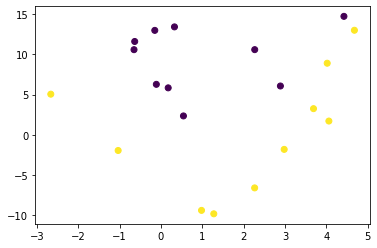

In [21]:
plt.scatter(X[:,0],X[:,1],c=y)

In [22]:
def standardize(x):
    mu = x.mean(axis=0)
    sigma = x.std(axis=0)
    return (x-mu)/sigma

z = standardize(X)
z.shape

(20, 2)

In [23]:
X = np.c_[np.ones(z.shape[0]),z,z[:,0]**2]
X.shape

(20, 4)

In [24]:
def sigmoid(z):
    return 1.0/(1+np.exp(-z))

def f(x,theta):
    return sigmoid(np.dot(x,theta))

y = y.reshape(-1,1)
eta = 0.01    # 学习率
epoch = 5000  # 迭代次数
theta = np.random.random((X.shape[1],1))

for _ in range(epoch):
    theta = theta - eta*X.T.dot(f(X,theta)-y)
theta.shape

(4, 1)

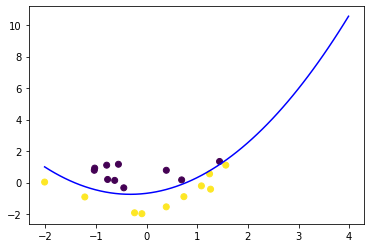

In [25]:
x = np.arange(np.min(X), np.max(X), 0.1)
y_pred = -(theta[0][0]+theta[1][0]*x+theta[3][0]*(x**2)) / theta[2][0]
plt.scatter(X[:,1],X[:,2],c=y[:,0])
plt.plot(x,y_pred,'b-')

## 最大熵模型

$$H(P)=-\sum_xP(x)\ logP(x)，且0\leq H(P)\leq log|X|$$